In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_parquet("./../../../resulting data/verses_features.parquet")

In [3]:
df.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(31065, 4167)

In [5]:
df["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '2SA', '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB',
       'PSA', 'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN',
       'HOS', 'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP',
       'HAG', 'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', 'ROM',
       '1CO', '2CO', 'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI',
       '2TI', 'TIT', 'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO',
       '3JO', 'JUD', 'REV'], dtype=object)

In [6]:
#df.fillna(0, inplace=True)

In [7]:
df.columns.tolist()[0:10]

['bible_identifier',
 'bible_book',
 'bible_chapter',
 'bible_book_chapter',
 'genre',
 'twitter_freq_sum_2014_2015',
 'twitter_freq_2014',
 'twitter_freq_2015',
 'relations',
 'monogamy']

In [8]:
structural_features = df.columns.tolist()[265:297]


In [9]:
sexual_features = df.columns.tolist()[8:262]

In [10]:
len(df)

31065

In [11]:
entities_features = df.columns.tolist()[262:265] + df.columns.tolist()[298:len(df)]

In [12]:
df.loc[df["bible_identifier"] == "b.SON.001.010"]["#per39"]

17547    1.0
Name: #per39, dtype: float64

In [13]:
df.describe()

,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
count,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.000000,31065.0,31065.000000,...,8.00000,2.0,1.0,1.0,1.0,1.0,1.0,23.000000,1.0,1.0
mean,2286.298793,1366.727797,919.570996,0.000225,0.000193,0.000515,0.001610,0.000064,0.0,0.000032,...,1.62500,1.0,1.0,1.0,2.0,3.0,1.0,1.173913,4.0,1.0
std,12282.503644,8274.810650,4428.844891,0.015010,0.013896,0.022689,0.040087,0.008024,0.0,0.005674,...,1.06066,0.0,NaN,NaN,NaN,NaN,NaN,0.491026,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.00000,1.0,1.0,1.0,2.0,3.0,1.0,1.000000,4.0,1.0
25%,72.000000,32.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.00000,1.0,1.0,1.0,2.0,3.0,1.0,1.000000,4.0,1.0
50%,239.000000,115.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.00000,1.0,1.0,1.0,2.0,3.0,1.0,1.000000,4.0,1.0
75%,941.000000,507.000000,415.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,2.00000,1.0,1.0,1.0,2.0,3.0,1.0,1.000000,4.0,1.0
max,875311.000000,613161.000000,262150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,4.00000,1.0,1.0,1.0,2.0,3.0,1.0,3.000000,4.0,1.0


In [14]:
#rel_books_df = books_df.div(books_df["number of verses"], axis="index")

In [15]:
entities_df = pd.read_excel("./../../../entities.xls")


In [16]:
entities_df.index = entities_df["id"]


In [21]:
df.index = df["bible_identifier"]

# Visualizations

In [18]:
sexual_features[0:10]

['relations',
 'monogamy',
 'poligamy',
 'marriage',
 'second-marriage',
 'second-marriage-divorce',
 'second-marriage-widow',
 'interfaith-marriage',
 'interfaith-relation',
 'non-marital-relation']

In [19]:
df.replace( 0, np.nan, inplace=True)

In [22]:
df[['blessed-aspect',
 'positive-aspect',
 'neutral-aspect',
 'negative-aspect',
 'condemned-aspect']]

,blessed-aspect,positive-aspect,neutral-aspect,negative-aspect,condemned-aspect
bible_identifier,,,,,
b.GEN.001.001,NaN,NaN,NaN,NaN,NaN
b.GEN.001.002,NaN,NaN,NaN,NaN,NaN
b.GEN.001.003,NaN,NaN,NaN,NaN,NaN
b.GEN.001.004,NaN,NaN,NaN,NaN,NaN
b.GEN.001.005,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
b.REV.022.017,NaN,NaN,NaN,NaN,NaN
b.REV.022.018,NaN,NaN,NaN,NaN,NaN
b.REV.022.019,NaN,NaN,NaN,NaN,NaN


In [24]:
df.loc["b.GEN.002.007"][['blessed-aspect',
 'positive-aspect',
 'neutral-aspect',
 'negative-aspect',
 'condemned-aspect']]

blessed-aspect        1
positive-aspect     NaN
neutral-aspect      NaN
negative-aspect     NaN
condemned-aspect    NaN
Name: b.GEN.002.007, dtype: object

In [25]:
df['blessed-aspect-nr'] = df['blessed-aspect'] * 2

In [26]:
df['positive-aspect-nr'] = df['positive-aspect'] * 1

In [27]:
df['neutral-aspect-nr'] = df['neutral-aspect'] * 0

In [28]:
df['negative-aspect-nr'] = df['negative-aspect'] * -1

In [29]:
df['condemned-aspect-nr'] = df['condemned-aspect'] * -2

In [30]:
df.columns.tolist()[-5:]

['blessed-aspect-nr',
 'positive-aspect-nr',
 'neutral-aspect-nr',
 'negative-aspect-nr',
 'condemned-aspect-nr']

In [31]:
df["sum-aspects"] =  df[['blessed-aspect-nr',
 'positive-aspect-nr',
 'neutral-aspect-nr',
 'negative-aspect-nr',
 'condemned-aspect-nr']].sum(axis = 1, skipna = True)

In [32]:
df.loc[(pd.isna(df['blessed-aspect-nr'])) & (pd.isna(df['positive-aspect-nr'])) & (pd.isna(df['neutral-aspect-nr'])) & (pd.isna(df['negative-aspect-nr'])) & (pd.isna(df['condemned-aspect-nr'])), "sum-aspects"] = np.nan

In [33]:
#df.replace(0,np.nan, inplace=True)

In [34]:
#df["sum-aspects"] = df["sum-aspects"] - 3

In [35]:
df["sum-aspects"]

bible_identifier
b.GEN.001.001   NaN
b.GEN.001.002   NaN
b.GEN.001.003   NaN
b.GEN.001.004   NaN
b.GEN.001.005   NaN
                 ..
b.REV.022.017   NaN
b.REV.022.018   NaN
b.REV.022.019   NaN
b.REV.022.020   NaN
b.REV.022.021   NaN
Name: sum-aspects, Length: 31065, dtype: float64

In [36]:
df["sum-aspects"].dropna()

bible_identifier
b.GEN.002.007    2.0
b.GEN.002.021    2.0
b.GEN.002.022    2.0
b.GEN.002.023    2.0
b.GEN.002.024    2.0
                ... 
b.REV.019.009    2.0
b.REV.021.002    2.0
b.REV.021.008   -2.0
b.REV.021.009    2.0
b.REV.022.015   -2.0
Name: sum-aspects, Length: 464, dtype: float64

In [37]:
df.loc["b.GEN.002.007"][['blessed-aspect-nr',
 'positive-aspect-nr',
 'neutral-aspect-nr',
 'negative-aspect-nr',
 'condemned-aspect-nr', "sum-aspects"]]

blessed-aspect-nr        2
positive-aspect-nr     NaN
neutral-aspect-nr      NaN
negative-aspect-nr     NaN
condemned-aspect-nr    NaN
sum-aspects              2
Name: b.GEN.002.007, dtype: object

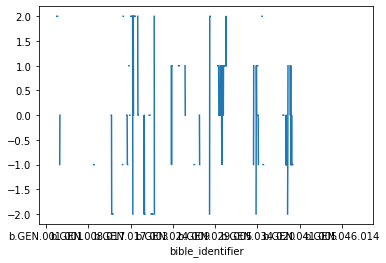

In [38]:
df.loc[df["bible_book"]== "GEN"]["sum-aspects"].T.plot.line()

In [39]:
books_df = df.groupby("bible_book").sum()
books_df["number of verses"] = df.groupby("bible_book").count().iloc[:,0].values.tolist()
books_df = books_df.loc[df["bible_book"].unique()]


In [40]:
books_df.replace(0, np.nan, inplace=True)

In [41]:
books_df

,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,...,#org52,#per129,#pla74,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr,sum-aspects,number of verses
bible_book,,,,,,,,,,,,,,,,,,,,,
GEN,938570.0,467676.0,470894.0,NaN,1.0,10.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,76.0,52.0,NaN,-46.0,-52.0,30.0,1533
EXO,532548.0,256961.0,275587.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1213
LEV,206505.0,91530.0,114975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,859
NUM,191596.0,95279.0,96317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1288
DEU,568536.0,335272.0,233264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1JO,1595001.0,1043423.0,551578.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105
2JO,23028.0,14143.0,8885.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
3JO,48185.0,27678.0,20507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [42]:
chapters_df = df.groupby("bible_book_chapter").sum()

In [43]:
chapters_df.replace(0, np.nan, inplace=True)

In [44]:
chapters_df["bible_book"] = chapters_df.index.str[0:3]

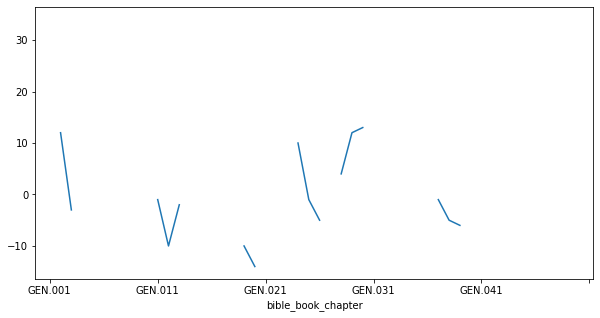

In [45]:


chapters_df.loc[chapters_df["bible_book"]== "GEN"]["sum-aspects"].T.plot.line(figsize = (10,5))

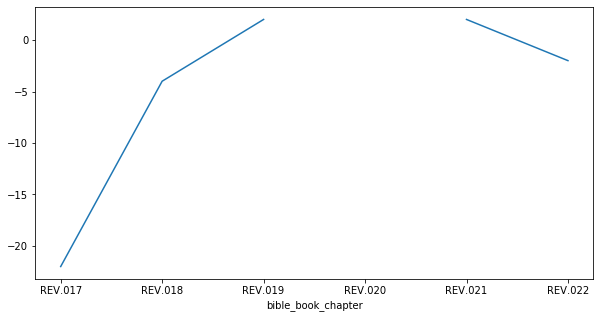

In [46]:


chapters_df.loc[chapters_df["bible_book"]== "REV"]["sum-aspects"].T.plot.line(figsize = (10,5))

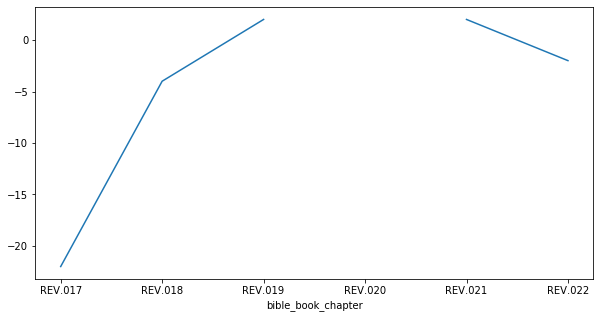

In [47]:
chapters_df.loc[chapters_df["bible_book"]== "REV"]["sum-aspects"].T.plot.line(figsize = (10,5))

In [51]:
df["sum-aspects"]

bible_identifier
b.GEN.001.001   NaN
b.GEN.001.002   NaN
b.GEN.001.003   NaN
b.GEN.001.004   NaN
b.GEN.001.005   NaN
                 ..
b.REV.022.017   NaN
b.REV.022.018   NaN
b.REV.022.019   NaN
b.REV.022.020   NaN
b.REV.022.021   NaN
Name: sum-aspects, Length: 31065, dtype: float64

In [52]:
df.loc[pd.isna(df["sum-aspects"]) == False]["bible_book"].unique()

array(['GEN', 'RUT', 'SON', 'MAT', 'JOH', '1CO', 'REV'], dtype=object)

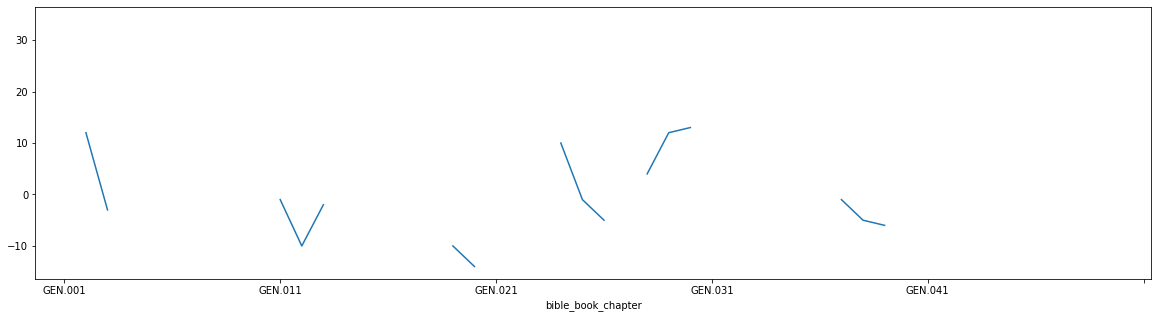

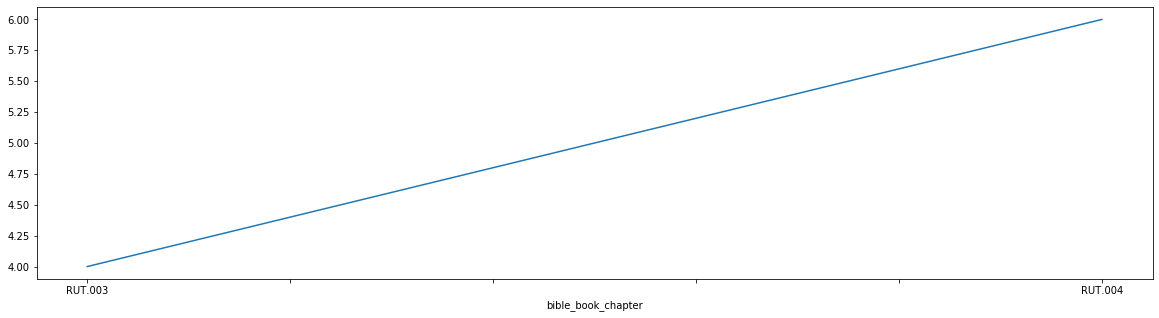

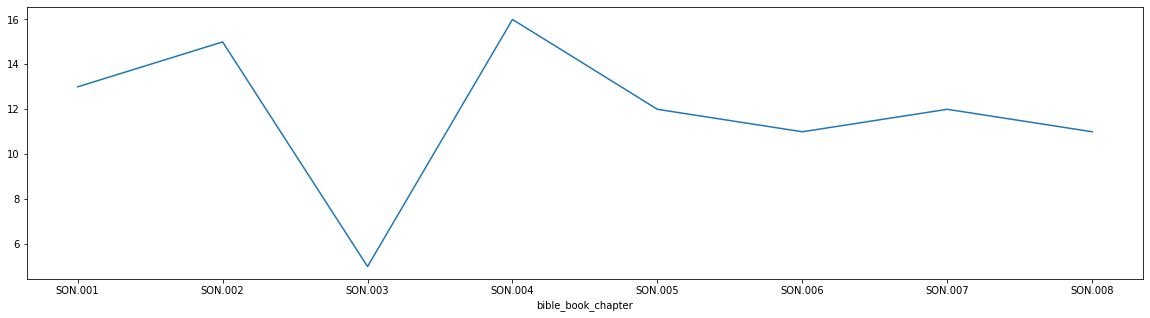

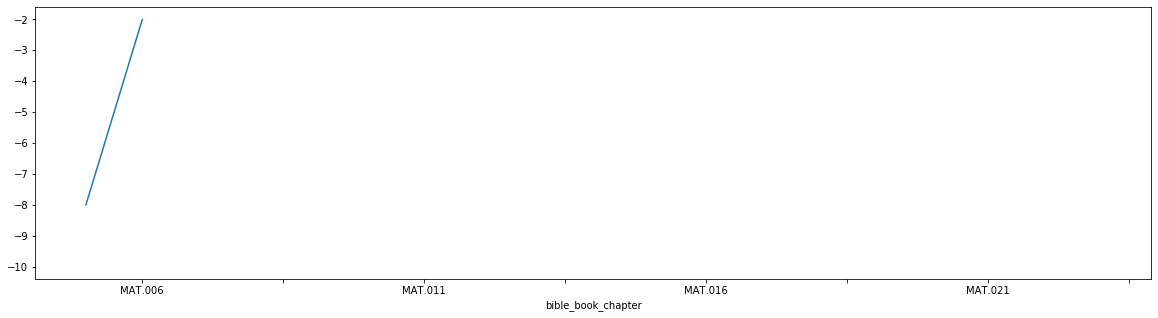

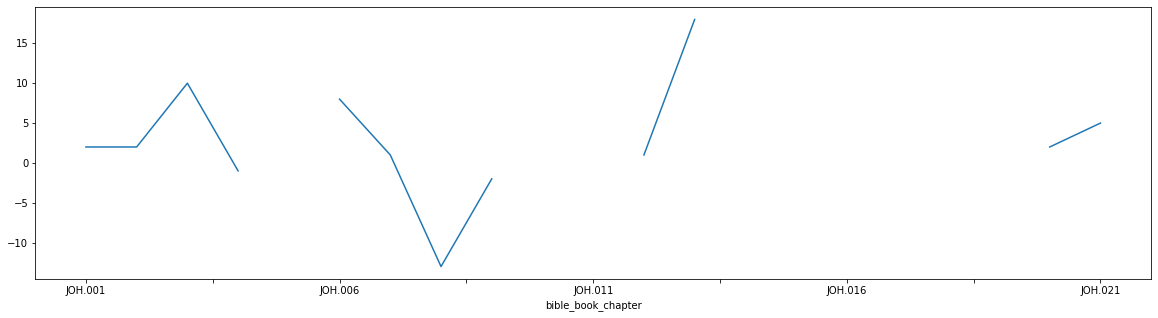

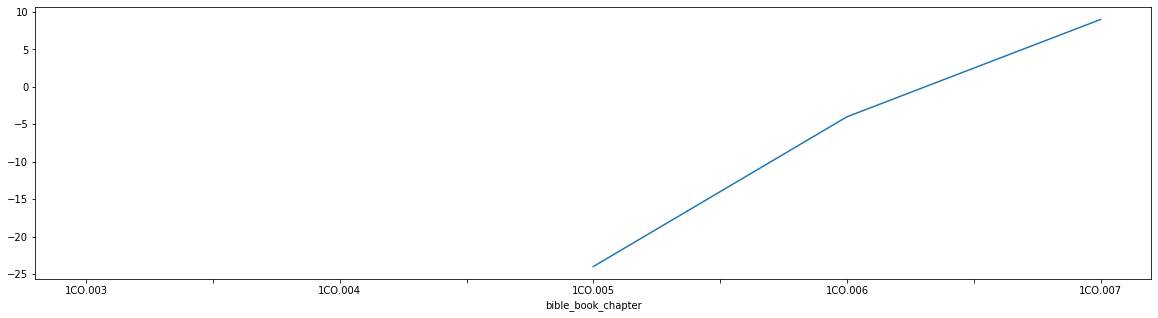

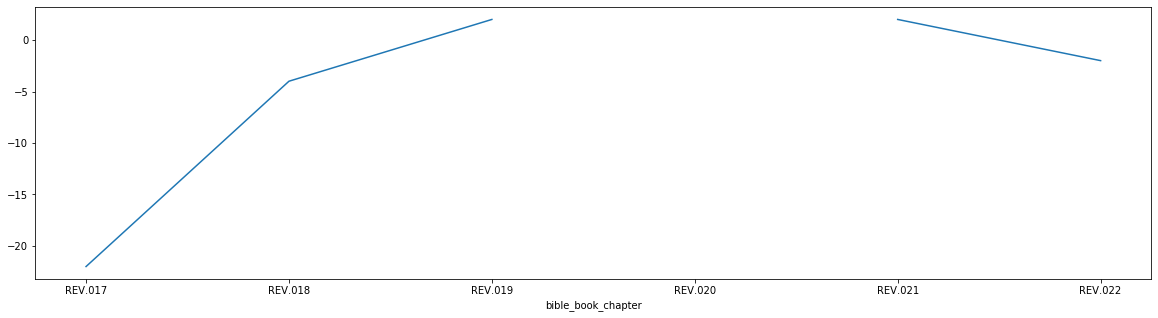

In [53]:
for book in df.loc[pd.isna(df["sum-aspects"]) == False]["bible_book"].unique().tolist():
    chapters_df.loc[chapters_df["bible_book"]== book]["sum-aspects"].T.plot.line(figsize = (20,5))
    plt.show()


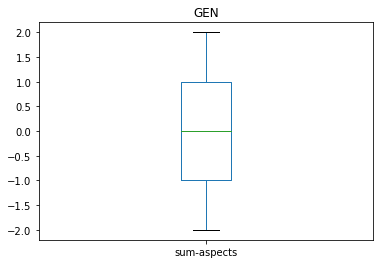

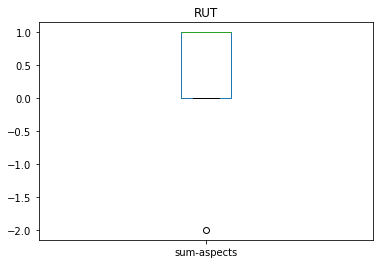

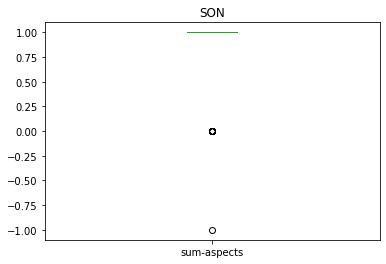

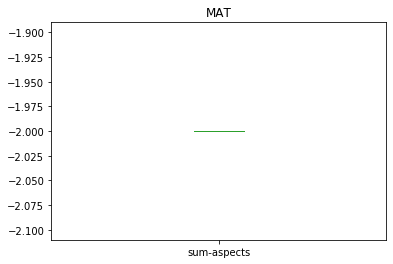

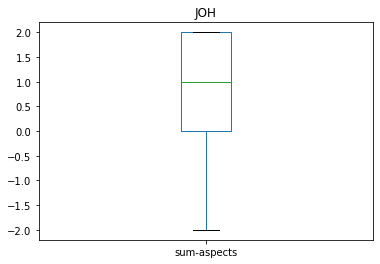

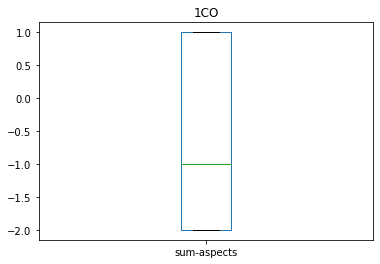

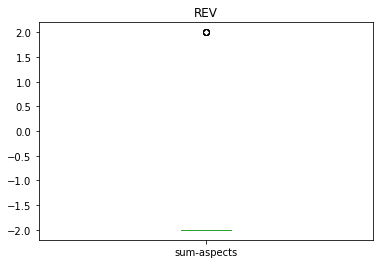

In [54]:
for book in df.loc[pd.isna(df["sum-aspects"]) == False]["bible_book"].unique().tolist():
    df.loc[df["bible_book"]== book]["sum-aspects"].T.plot.box(title = book)
    plt.show()


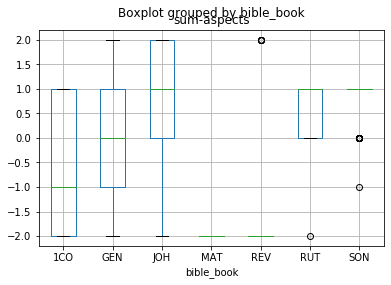

In [56]:
df.loc[df["bible_book"].isin(df.loc[pd.isna(df["sum-aspects"]) == False]["bible_book"].unique().tolist())].boxplot("sum-aspects", by = "bible_book")


In [78]:
#df.index = df["bible_identifier"]

In [67]:
sexual_features = sexual_features + ["sum-aspects"] + ['blessed-aspect-nr',
 'positive-aspect-nr',
 'neutral-aspect-nr',
 'negative-aspect-nr',
 'condemned-aspect-nr']

In [68]:
sexual_features

['relations',
 'monogamy',
 'poligamy',
 'marriage',
 'second-marriage',
 'second-marriage-divorce',
 'second-marriage-widow',
 'interfaith-marriage',
 'interfaith-relation',
 'non-marital-relation',
 'marital-relation-political-family',
 'lord-servant-relation',
 'marital-relation-direct-family',
 'arranged-marriage',
 'divorce',
 'engaged',
 'love',
 'jealousy',
 'ascendant-descendant',
 'indirect-ascendant-descendant',
 'acts',
 'social-related-act',
 'wedding',
 'body-related-act',
 'massage',
 'kiss',
 'hug',
 'dance',
 'abortion',
 'circumcision',
 'breast-feeding',
 'sexual-act',
 'sexual-act-stage',
 'seduction',
 'erotic-time',
 'initation-sexual-act',
 'orgasm',
 'ejaculation',
 'time-after-sex',
 'sexual-act-type',
 'coitus',
 'first-sexual-act',
 'coitus-interruptus',
 'self-masturbation',
 'masturbation',
 'oral-sex',
 'anal-sex',
 'non-penetrative-sex',
 'female-rape',
 'male-rape',
 'sexual-assault',
 'female-sexual-assault',
 'male-sexual-assault',
 'sexual-deception',


In [69]:
#sexual_features = sexual_features[0:-6]

In [108]:
sexual_thems_df = df.loc[df["bible_book"].isin(df.loc[df["sum-aspects"] != 0]["bible_book"].unique().tolist())][sexual_features]

In [109]:
sexual_thems_df

,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,non-marital-relation,...,night,sunrise,seasons,winter,sum-aspects,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.REV.022.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.REV.022.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.REV.022.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
sexual_thems_df["sum-aspects"]

bible_identifier
b.GEN.001.001   NaN
b.GEN.001.002   NaN
b.GEN.001.003   NaN
b.GEN.001.004   NaN
b.GEN.001.005   NaN
                 ..
b.REV.022.017   NaN
b.REV.022.018   NaN
b.REV.022.019   NaN
b.REV.022.020   NaN
b.REV.022.021   NaN
Name: sum-aspects, Length: 31065, dtype: float64

In [111]:
for index, row in sexual_thems_df.loc[pd.isna(sexual_thems_df["sum-aspects"]) == False ].iterrows():
    sum_value = row["sum-aspects"]
    sexual_thems_df.loc[index,row[pd.isna(row) == False].index] = sum_value


In [112]:
sexual_thems_df

,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,non-marital-relation,...,night,sunrise,seasons,winter,sum-aspects,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.REV.022.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.REV.022.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.REV.022.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
sexual_thems_df.loc[sexual_thems_df.index.str.contains("GEN")]

,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,non-marital-relation,...,night,sunrise,seasons,winter,sum-aspects,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.GEN.050.022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.050.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.050.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
sexual_thems_df.loc[pd.isna(sexual_thems_df["second-marriage"]) == False]

,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,non-marital-relation,...,night,sunrise,seasons,winter,sum-aspects,blessed-aspect-nr,positive-aspect-nr,neutral-aspect-nr,negative-aspect-nr,condemned-aspect-nr
bible_identifier,,,,,,,,,,,,,,,,,,,,,
b.1CO.007.011,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.1CO.007.015,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
sexual_thems_df["book"] = sexual_thems_df.index.str[2:5]

In [116]:
sexual_thems_df.notna().sum().sort_values(ascending=False).index.tolist()[0:10]

['book',
 'sum-aspects',
 'ascendant-descendant',
 'positive-aspect-nr',
 'love',
 'non-marital-relation',
 'condemned-aspect-nr',
 'birth',
 'sex-outside-marriage',
 'neutral-aspect-nr']

In [117]:
sexual_thems_df = sexual_thems_df[sexual_thems_df.notna().sum().sort_values(ascending=False).index.tolist()]

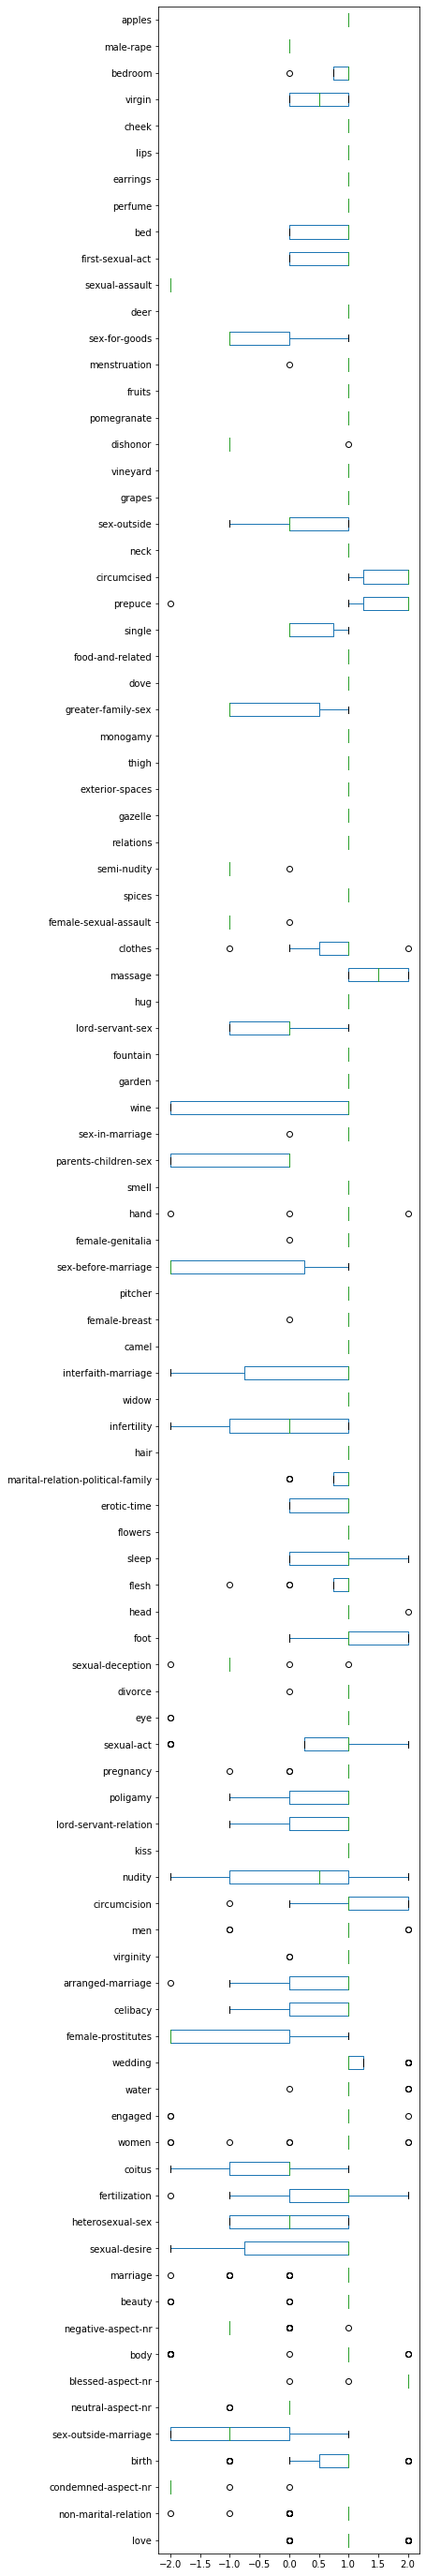

In [123]:
sexual_thems_df.loc[sexual_thems_df["book"].isin(df.loc[ pd.isna(df["sum-aspects"]) == False]["bible_book"].unique().tolist())].iloc[:,4:100].plot.box(vert=False, figsize = (5, 50))

In [119]:
sexual_thems_df.loc[sexual_thems_df["book"].isin(df.loc[ pd.isna(df["sum-aspects"]) == False]["bible_book"].unique().tolist())].iloc[:,1:10]

,sum-aspects,ascendant-descendant,positive-aspect-nr,love,non-marital-relation,condemned-aspect-nr,birth,sex-outside-marriage,neutral-aspect-nr
bible_identifier,,,,,,,,,
b.GEN.001.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.GEN.001.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
b.REV.022.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.REV.022.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b.REV.022.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
